# 2. Analisa Variabel Kategorik (PMF)

1. Gender mana yang memiliki tagihan paling tinggi?
2. Distribusi peluang tagihan di tiap-tiap region
3. Apakah setiap region memiliki proporsi data banyak orang yang sama?
4. Mana yang lebih tinggi proporsi perokok atau non perokok?
5. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?
6. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?
7. Bagaimana bentuk distribusi tagihan dari tiap-tiap region?

In [1]:
import pandas as pd
import numpy as np
from numpy import cov
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def load_data_insurance():
    data_insurance = pd.read_csv("insurance.csv")
    data_insurance = data_insurance.assign(bmi_category=pd.cut(data_insurance['bmi'], 
                               bins=[0, 25, 60], 
                               labels=['normal', 'over']))
    data_insurance = data_insurance.assign(charges_category=pd.cut(data_insurance['charges'], 
                               bins=[0, 16_700, 65_000], 
                               labels=['normal', 'high']))
    return data_insurance

In [3]:
data_insurance = load_data_insurance()
# data_insurance

             charges            
                mean      median
sex                             
female  12569.578844  9412.96250
male    13956.751178  9369.61575
AxesSubplot(0.1,0.15;0.8x0.75)


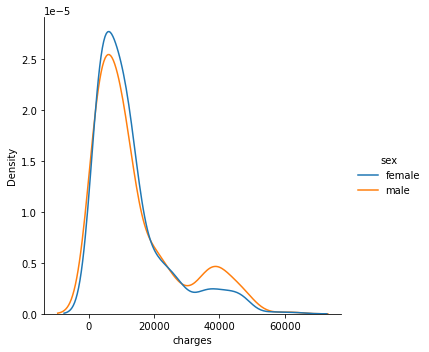

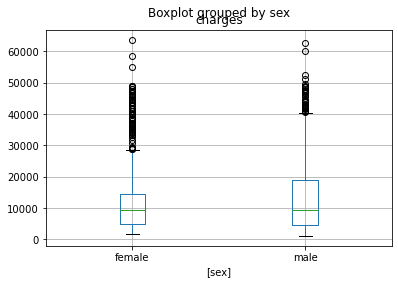

In [4]:
# 1. Gender mana yang memiliki tagihan paling tinggi?

sns.displot(data=data_insurance, x="charges", hue="sex", kind="kde")

mean_charges = (data_insurance.groupby(['sex'])).agg({'charges' : ['mean', 'median']})
print(mean_charges)

boxplot_charges_by_sex = data_insurance.boxplot(column='charges', by=['sex'])
print(boxplot_charges_by_sex)



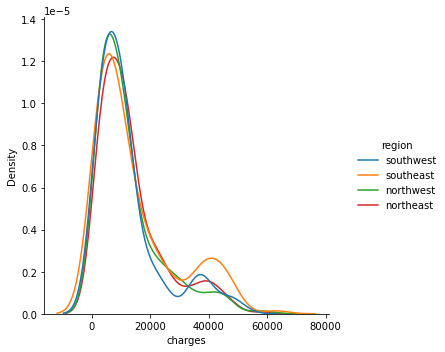

In [5]:
# 2. Distribusi peluang tagihan di tiap-tiap region

sns.displot(data=data_insurance, x="charges", hue="region", kind="kde")

<AxesSubplot:xlabel='region', ylabel='Proportion'>

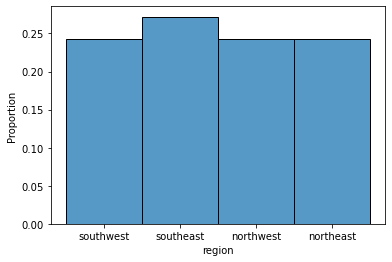

In [6]:
# 3. Apakah setiap region memiliki proporsi data banyak orang yang sama?

sns.histplot(data=data_insurance, x="region", stat='proportion')

<AxesSubplot:xlabel='smoker', ylabel='Proportion'>

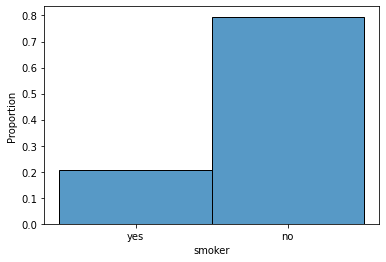

In [7]:
# 4. Mana yang lebih tinggi proporsi perokok atau non perokok?

sns.histplot(data=data_insurance, x="smoker", stat='proportion')

In [8]:
# 5. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?

crosstab_smoker_vs_sex = pd.crosstab(data_insurance['sex'], data_insurance['smoker'], rownames = [''], colnames=['smoker'])

# total = crosstab_smoker_vs_sex['no'].sum() + crosstab_smoker_vs_sex['yes'].sum()
female_and_smoker = crosstab_smoker_vs_sex['yes']['female']
smoker = crosstab_smoker_vs_sex['yes'].sum()

p_female_given_smoker = female_and_smoker/smoker

print(f"Peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok {p_female_given_smoker:.2f}\n")
print(crosstab_smoker_vs_sex)

Peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok 0.42

smoker   no  yes
                
female  547  115
male    517  159


In [9]:
# 6. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?

male_and_smoker = crosstab_smoker_vs_sex['yes']['male']
smoker = crosstab_smoker_vs_sex['yes'].sum()

p_male_given_smoker = male_and_smoker/smoker

print(f"Peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok {p_male_given_smoker:.2f}\n")

Peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok 0.58



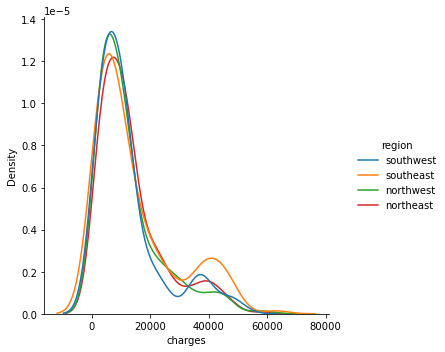

In [10]:
# 7. Bagaimana bentuk distribusi tagihan dari tiap-tiap region?

sns.displot(data=data_insurance, x="charges", hue="region", kind="kde")